## Analysis Notebook

### Import libraries

In [12]:
# Importing necessary libraries for data analysis and visualization
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Read Data

In [3]:
# Read data
df_playlist = pd.read_csv('data/playlist_data.csv')
df_playlist

,#,Song,Artist,BPM,Camelot,Energy,Added At,Duration,Popularity,Genres,...,Acoustic,Instrumental,Valence,Speech,Live,Loud (Db),Key,Time Signature,Spotify Track Id,ISRC
0,1,Monster vs. Angel,"WDL,mawe",140,2A,56,2026-01-18,03:25,53,NaN,...,86,54,31,0,10,-6,D#/E♭ Minor,4,0stKYWa4tQ0jFXmOUDFbxM,SEWEE1501902
1,2,Tread On Me,Matt Maeson,140,8B,49,2026-01-18,03:30,47,NaN,...,44,0,54,0,20,-8,C Major,4,750amxX4DpEsA5N2IcAtm5,USAT21900732
2,3,Glue Myself Shut,Noah Kahan,73,3B,31,2026-01-18,03:16,71,NaN,...,88,0,70,0,30,-8,C♯/D♭ Major,4,67q8yivDoOPXCYodi1zTix,USUM72009075
3,4,Alright,Demons Of Ruby Mae,180,8A,87,2026-01-18,02:46,3,NaN,...,0,0,48,0,0,-5,A Minor,4,18jFJ06fHCUdejRzuI89Tp,UKX3E2100001
4,5,Loud(y),Lewis Del Mar,140,6A,56,2026-01-18,04:09,32,NaN,...,26,0,50,0,10,-7,G Minor,4,2Df8M8sO1zhC71p2XQRwpj,USSM11509018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,Snap Out Of It,Arctic Monkeys,130,4A,64,2026-01-22,03:13,80,"indie, garage rock",...,25,0,87,0,10,-6,F Minor,4,0NdTUS4UiNYCNn5FgVqKQY,GBCEL1300371
71,72,Wires,The Neighbourhood,146,6A,59,2026-01-23,03:12,45,NaN,...,0,33,28,0,30,-6,G Minor,4,4ObATYHHvXXlJJQ4rPKU2s,USSM11204648
72,73,When You Were Young,The Killers,130,1B,99,2026-01-23,03:40,79,alternative rock,...,0,5,32,10,20,-3,B Major,4,70wYA8oYHoMzhRRkARoMhU,USUM70605164
73,74,Finding Me,Vertical Horizon,99,2B,93,2026-01-23,04:32,33,NaN,...,0,0,44,0,20,-5,F#/G♭ Major,4,1kFokK4qD3mAXfM0BUHkXS,USRC19900052


### Explore Data

In [4]:
# Describe data
df_describe = df_playlist.describe()
df_describe

,#,BPM,Energy,Popularity,Dance,Acoustic,Instrumental,Valence,Speech,Live,Loud (Db),Time Signature
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,38.000000,123.480000,65.413333,47.746667,57.026667,22.053333,5.573333,40.840000,2.533333,11.600000,-6.333333,3.920000
std,21.794495,31.437351,17.770377,21.465304,14.470822,26.655912,16.792190,18.403172,6.595111,13.758535,2.113875,0.394558
min,1.000000,73.000000,16.000000,0.000000,23.000000,0.000000,0.000000,4.000000,0.000000,0.000000,-16.000000,1.000000
25%,19.500000,95.500000,53.000000,36.000000,47.000000,1.000000,0.000000,28.500000,0.000000,0.000000,-8.000000,4.000000
50%,38.000000,120.000000,63.000000,48.000000,56.000000,8.000000,0.000000,43.000000,0.000000,10.000000,-6.000000,4.000000
75%,56.500000,140.000000,80.000000,61.000000,68.000000,42.500000,0.000000,49.500000,0.000000,20.000000,-5.000000,4.000000
max,75.000000,204.000000,99.000000,84.000000,90.000000,88.000000,82.000000,93.000000,40.000000,60.000000,-2.000000,4.000000


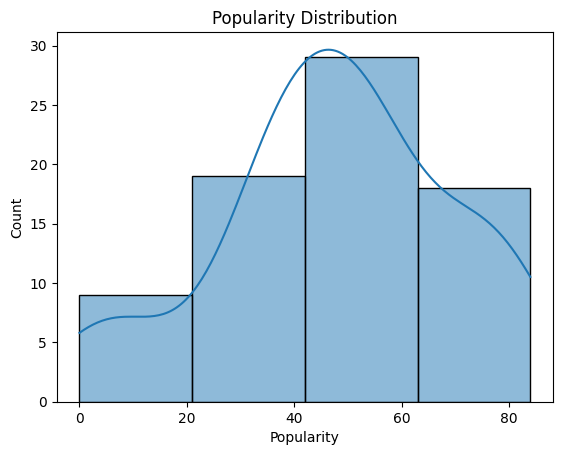

In [36]:
# Plot popularity distribution
sns.histplot(data=df_playlist, x='Popularity', kde=True, bins=4)
plt.title('Popularity Distribution')
plt.ylabel('Count')
plt.savefig('images/popularity_distribution.png', dpi=200)
plt.show()

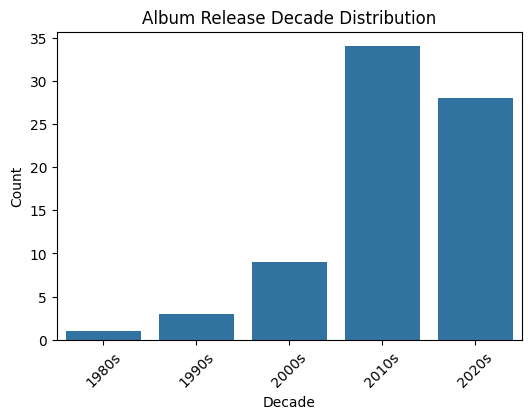

In [53]:
# Bin album release years into decades
def bin_decade(year):
    if year < 1990:
        return '1980s'
    elif year < 2000:
        return '1990s'
    elif year < 2010:
        return '2000s'
    elif year < 2020:
        return '2010s'
    else:
        return '2020s'

# Get year from 'Album Date' and bin into decades
df_playlist['Year'] = pd.to_datetime(df_playlist['Album Date'], errors='coerce').dt.year
df_playlist['Decade'] = df_playlist['Year'].apply(bin_decade)
decade_counts = df_playlist['Decade'].value_counts().sort_index()

# Plot decade distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=decade_counts.index, y=decade_counts.values)
plt.title('Album Release Decade Distribution')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('images/decade_distribution.png', dpi=200, bbox_inches='tight')
plt.show()

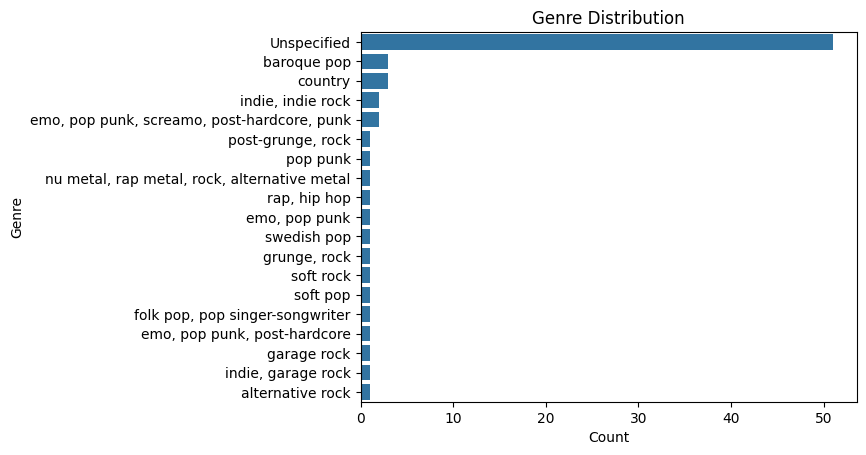

In [51]:
# Genre distribution, include null values
df_playlist['Genres'] = df_playlist['Genres'].fillna('Unspecified')
genre_counts = df_playlist['Genres'].value_counts()
sns.barplot(y=genre_counts.index, x=genre_counts.values)
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.savefig('images/genre_distribution.png', dpi=200, bbox_inches='tight')
plt.show()

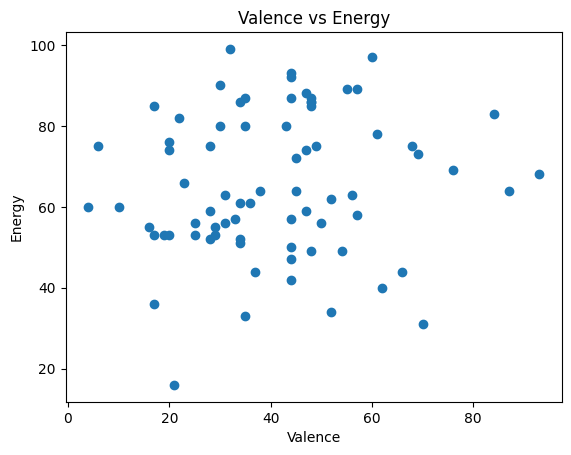

In [5]:
# Plot valence vs energy
plt.scatter(df_playlist['Valence'], df_playlist['Energy'])
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.title('Valence vs Energy')
plt.show()

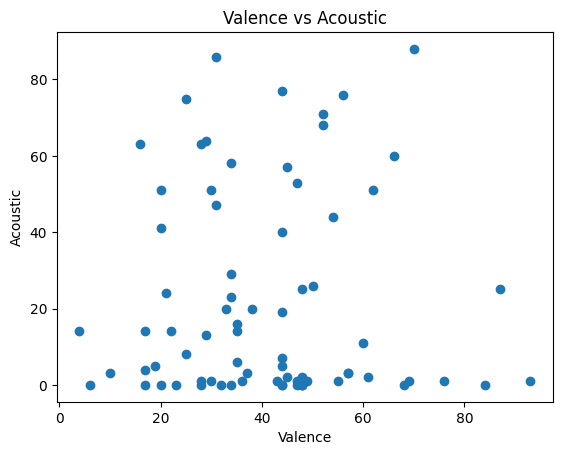

In [6]:
# Plot valence vs. acousticness
plt.scatter(df_playlist['Valence'], df_playlist['Acoustic'])
plt.xlabel('Valence')
plt.ylabel('Acoustic')
plt.title('Valence vs Acoustic')
plt.show()

In [25]:
# Cluster analysis
# Select features
features = ['Valence', 'Energy']
#  , 'Dance', 'Loud (Db)', 'Popularity']
X = df_playlist[features].copy()

# Handle any missing values (just in case)
X = X.dropna()
df_model = df_playlist.loc[X.index].copy()

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Pick k using silhouette (2..8)
scores = {}
for k in range(2, 9):
    km = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = km.fit_predict(X_scaled)
    scores[k] = silhouette_score(X_scaled, labels)

best_k = max(scores, key=scores.get)
best_k, scores[best_k]
print("Best k:", best_k, "Score:", scores[best_k])

Best k: 6 Score: 0.42782143373454157


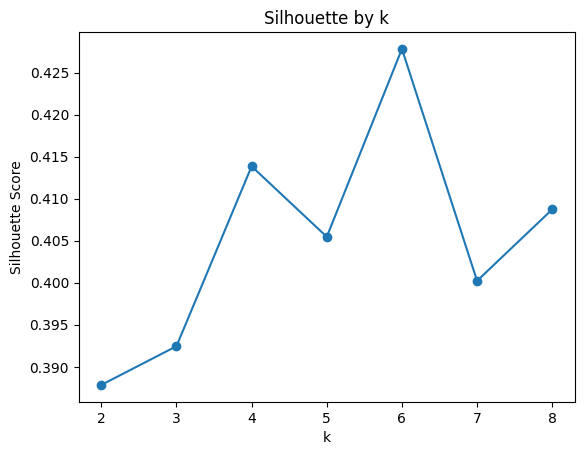

In [26]:
# Plot the best k silhouette scores
plt.plot(list(scores.keys()), list(scores.values()), marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette by k')
plt.show()

In [27]:
# Fit model with best k
kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
df_model['cluster'] = kmeans.fit_predict(X_scaled)

# Cluster summary (scaled features can be hard to read; use raw means)
cluster_summary = df_model.groupby('cluster')[features].mean().round(2)
cluster_counts = df_model['cluster'].value_counts().sort_index()

cluster_summary, cluster_counts

(         Valence  Energy
 cluster                 
 0          79.50   72.00
 1          25.90   56.81
 2          25.75   82.42
 3          51.29   49.94
 4          49.25   84.88
 5          24.33   28.33,
 cluster
 0     6
 1    21
 2    12
 3    17
 4    16
 5     3
 Name: count, dtype: int64)

In [16]:
# Get cluster results
df_model

,#,Song,Artist,BPM,Camelot,Energy,Added At,Duration,Popularity,Genres,...,Instrumental,Valence,Speech,Live,Loud (Db),Key,Time Signature,Spotify Track Id,ISRC,cluster
0,1,Monster vs. Angel,"WDL,mawe",140,2A,56,2026-01-18,03:25,53,NaN,...,54,31,0,10,-6,D#/E♭ Minor,4,0stKYWa4tQ0jFXmOUDFbxM,SEWEE1501902,1
1,2,Tread On Me,Matt Maeson,140,8B,49,2026-01-18,03:30,47,NaN,...,0,54,0,20,-8,C Major,4,750amxX4DpEsA5N2IcAtm5,USAT21900732,3
2,3,Glue Myself Shut,Noah Kahan,73,3B,31,2026-01-18,03:16,71,NaN,...,0,70,0,30,-8,C♯/D♭ Major,4,67q8yivDoOPXCYodi1zTix,USUM72009075,3
3,4,Alright,Demons Of Ruby Mae,180,8A,87,2026-01-18,02:46,3,NaN,...,0,48,0,0,-5,A Minor,4,18jFJ06fHCUdejRzuI89Tp,UKX3E2100001,4
4,5,Loud(y),Lewis Del Mar,140,6A,56,2026-01-18,04:09,32,NaN,...,0,50,0,10,-7,G Minor,4,2Df8M8sO1zhC71p2XQRwpj,USSM11509018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,Snap Out Of It,Arctic Monkeys,130,4A,64,2026-01-22,03:13,80,"indie, garage rock",...,0,87,0,10,-6,F Minor,4,0NdTUS4UiNYCNn5FgVqKQY,GBCEL1300371,0
71,72,Wires,The Neighbourhood,146,6A,59,2026-01-23,03:12,45,NaN,...,33,28,0,30,-6,G Minor,4,4ObATYHHvXXlJJQ4rPKU2s,USSM11204648,1
72,73,When You Were Young,The Killers,130,1B,99,2026-01-23,03:40,79,alternative rock,...,5,32,10,20,-3,B Major,4,70wYA8oYHoMzhRRkARoMhU,USUM70605164,2
73,74,Finding Me,Vertical Horizon,99,2B,93,2026-01-23,04:32,33,NaN,...,0,44,0,20,-5,F#/G♭ Major,4,1kFokK4qD3mAXfM0BUHkXS,USRC19900052,4


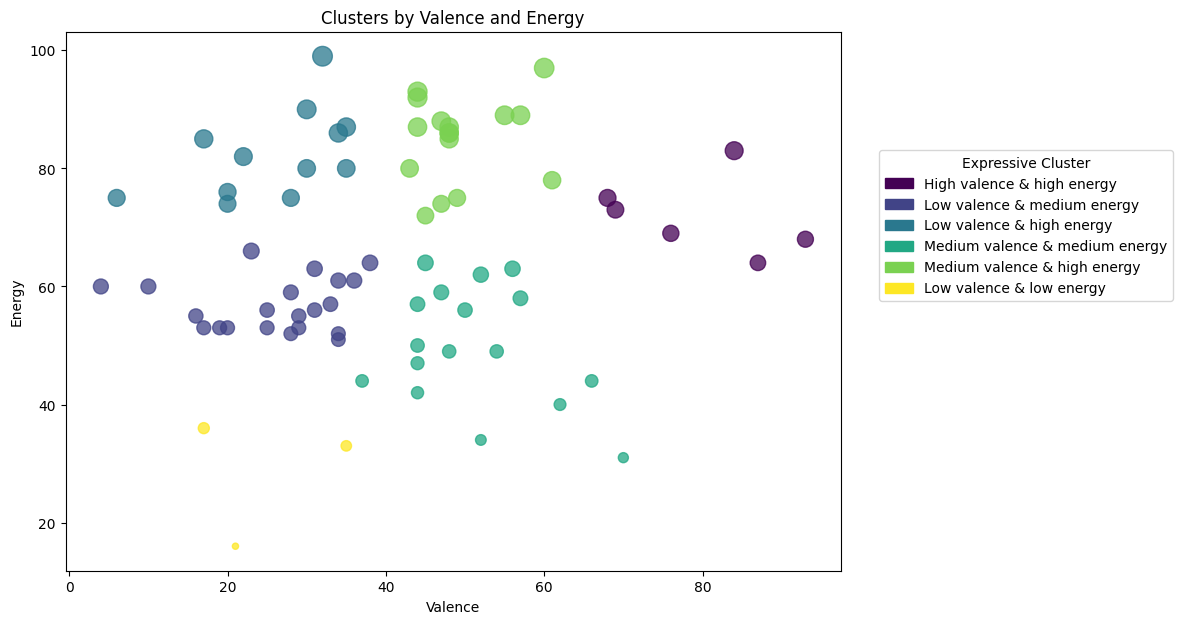

In [28]:
# Plot valence vs acousticness with clusters
cluster_labels = {
    0: 'High valence & high energy',
    1: 'Low valence & medium energy',
    2: 'Low valence & high energy',
    3: 'Medium valence & medium energy',
    4: 'Medium valence & high energy',
    5: 'Low valence & low energy'
}
# Add size for energy
sizes = 20 + (df_model['Energy'] - df_model['Energy'].min()) / (df_model['Energy'].max() - df_model['Energy'].min()) * 180
# Create scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    df_model['Valence'],
    df_model['Energy'],
    c=df_model['cluster'],
    s=sizes,
    alpha=0.75
)
# Add labels and title
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.title('Clusters by Valence and Energy')
# Add legend
handles = [
    mpatches.Patch(color=scatter.cmap(scatter.norm(k)), label=v)
    for k, v in cluster_labels.items()
]
plt.legend(handles=handles, title='Expressive Cluster', loc=(1.05, 0.5))
# Save and show plot
plt.savefig('images/clusters.png', dpi=200, bbox_inches='tight')
plt.show()